<a href="https://colab.research.google.com/github/ArmandoGalaz/prueba/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparacion del entorno

##Conexion a drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Librerias

In [ ]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 37.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [ ]:
!pip install spacy textstat textblob num2words
!python -m spacy download es_core_news_sm
!pip install -U scikit-learn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=23627cfcdba23607f0946b654b25183fad1bf1f3c96d266d27c785758664e0fe
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 26.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do th

In [ ]:
!pip install umap-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import nltk
from nltk.tokenize import (word_tokenize,
                           sent_tokenize,
                           TweetTokenizer)
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
import textstat
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from nltk.stem import SnowballStemmer
from num2words import num2words
from transformers import AutoTokenizer, AutoModel
import torch
from typing import Union, List, Dict, Optional
from num2words import num2words
from sklearn.decomposition import PCA, TruncatedSVD
import os
import warnings
from sklearn.manifold import TSNE
import umap
from wordcloud import WordCloud


In [ ]:
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

True

##Lectura Dataset

In [ ]:
ruta_train = "/content/drive/Shared drives/Titulo 2/Dataset/train.csv"
ruta_test = "/content/drive/Shared drives/Titulo 2/Dataset/test.csv"
ruta_dataset = "/content/drive/Shareddrives/Titulo 2/Dataset/dataset.csv"
ruta_datos_procesados = "/content/drive/Shareddrives/Titulo 2/Dataset/dataset.csv"

df_eda = pd.read_csv(ruta_dataset)
df_train = pd.read_csv(ruta_train)
df_test = pd.read_csv(ruta_test)
df_procesados = pd.read_csv(ruta_datos_procesados)

#Analisis Exploratorio EDA

##Seccion de Funciones

Estilos para que se vea mejor la observacion del df

In [ ]:
# Definir estilo de borde para delimitar cada columna
table_styles = [
    {'selector': 'th', 'props': [('font-weight', 'bold'), ('border', '1px solid black')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]}]

Funcion para mostrar las primeras 5 filas del df

In [ ]:
# Mostrar las primeras 5 filas de cada DataFrame
def display_dataframe(df, title):
    print(f"\n{title} (primeras 5 filas):")
    display(df.head(10000).style.set_table_styles(table_styles).set_properties(**{'text-align': 'center'}))

In [ ]:
display_dataframe(df_procesados, "Primer Vistazo")


Primer Vistazo (primeras 5 filas):


Funcion para observar el tipo de dato que tiene cada columna del df

In [ ]:
def Clase_Tipo_Dato(df):

    combined_df = pd.DataFrame({
        'Columna': df.columns,
        'Tipo de dato': [df[column].dtypes for column in df.columns],
        'Numero de clases unicas': [df[column].nunique() for column in df.columns]
    })

    # Mostrar el DataFrame estilizado
    display(combined_df.style.set_table_styles(table_styles).set_properties(**{'text-align': 'center'}))


In [ ]:
def limpiar_df(df: pd.DataFrame) -> pd.DataFrame:

    invalid_markers = {"invalid", "no valido", "nan", "n/a"}
    n_inicio = len(df)

    # 1. Eliminar duplicados
    df_clean = df.drop_duplicates()

    # 2. Eliminar filas con cualquier NaN o None
    df_clean = df_clean.dropna(how="any")

    # 3. Eliminar filas con marcadores inválidos en cualquier columna de tipo texto
    def fila_valida(row):
        for val in row:
            if isinstance(val, str) and val.strip().lower() in invalid_markers:
                return False
        return True

    df_clean = df_clean[df_clean.apply(fila_valida, axis=1)]

    n_final = len(df_clean)
    print(f"Se eliminaron {n_inicio - n_final} filas problemáticas (duplicadas, nulas o inválidas).")

    return df_clean

In [ ]:
def graficar_histograma(df: pd.DataFrame, columna: str, bins='auto'):

    datos = df[columna].dropna()
    fig, ax = plt.subplots()

    # Detectar si la columna es numérica
    if pd.api.types.is_numeric_dtype(datos):
        counts, bin_edges = np.histogram(datos, bins=bins)
        centros = (bin_edges[:-1] + bin_edges[1:]) / 2
        width = (bin_edges[1] - bin_edges[0]) * 0.9  # barras más juntas
        ax.bar(centros, counts, width=width, align='center')
        for x, y in zip(centros, counts):
            ax.text(x, y, str(y), ha='center', va='bottom')
        ax.set_xlabel(columna)
        ax.set_ylabel("Frecuencia")
        ax.set_title(f"Histograma de {columna}")
    else:
        # Columnas categóricas: conteo de valores
        conteos = datos.value_counts()
        x = np.arange(len(conteos))
        ax.bar(x, conteos.values)
        ax.set_xticks(x)
        ax.set_xticklabels(conteos.index, rotation=45, ha='right')
        for xi, yi in zip(x, conteos.values):
            ax.text(xi, yi, str(yi), ha='center', va='bottom')
        ax.set_xlabel(columna)
        ax.set_ylabel("Frecuencia")
        ax.set_title(f"Frecuencia de la columna de {columna}")
        plt.tight_layout()

    plt.show()


In [ ]:
def estadisticas_descriptivas_por_categoria(df: pd.DataFrame,
                                            texto_col: str = "Texto",
                                            cat_col: str = "Categoría") -> pd.DataFrame:
    df2 = df.copy()

    df2['Cantidad de tokens'] = df2[texto_col].str.split().str.len()

    # Conteo de caracteres
    df2['Cantidad de caracteres'] = df2[texto_col].str.len()

    # Conteo de oraciones (según signos de puntuación . ! ?)
    df2['Cantidad de oraciones'] = df2[texto_col].str.count(r'[\.!?]')

    # Conteo de signos de exclamación e interrogación
    df2['Cantidad de exclamaciones'] = df2[texto_col].str.count(r'!')
    df2['Cantidad de preguntas']     = df2[texto_col].str.count(r'\?')

    # Conteo de palabras completamente en mayúsculas
    df2['Palabras en mayúsculas'] = df2[texto_col].apply(
    lambda x: sum(1 for w in x.split() if w.isalpha() and w.isupper())
)

# Lista de nombres de métricas en español
    métricas = [
      'Cantidad de tokens',
      'Cantidad de caracteres',
      'Cantidad de oraciones',
      'Cantidad de exclamaciones',
      'Cantidad de preguntas',
      'Palabras en mayúsculas'
  ]

    # Describe global
    print("=== Estadísticas globales ===")
    print(df2[métricas].describe(), "\n")

    # Describe por categoría
    for cat, grupo in df2.groupby(cat_col):
        print(f"=== Estadísticas para Categoría = {cat} ===")
        print(grupo[métricas].describe(), "\n")

    return df2


In [ ]:
def vocabulario_y_ngramas(df: pd.DataFrame,
                          texto_col: str = "Texto",
                          cat_col: str = "Categoria",
                          top_k: int = 20):

    # Descargar stopwords si es necesario
    nltk.download('stopwords', quiet=True)
    from nltk.corpus import stopwords
    spanish_stop = stopwords.words('spanish')

    categorias = df[cat_col].unique()

    for cat in categorias:
        texts = df[df[cat_col] == cat][texto_col].fillna("")

        # Unigramas
        vec_uni = CountVectorizer(ngram_range=(1,1), stop_words=spanish_stop)
        X_uni = vec_uni.fit_transform(texts)
        suma_uni = X_uni.sum(axis=0).A1
        uni_terms = vec_uni.get_feature_names_out()
        df_uni = pd.DataFrame({'term': uni_terms, 'count': suma_uni})
        top_uni = df_uni.sort_values('count', ascending=False).head(top_k)

        fig, ax = plt.subplots()
        ax.bar(range(len(top_uni)), top_uni['count'])
        ax.set_xticks(range(len(top_uni)))
        ax.set_xticklabels(top_uni['term'], rotation=45, ha='right')
        ax.set_title(f"Top {top_k} Unigramas en {cat}")
        ax.set_ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

        # Bigramas
        vec_bi = CountVectorizer(ngram_range=(2,2), stop_words=spanish_stop)
        X_bi = vec_bi.fit_transform(texts)
        suma_bi = X_bi.sum(axis=0).A1
        bi_terms = vec_bi.get_feature_names_out()
        df_bi = pd.DataFrame({'term': bi_terms, 'count': suma_bi})
        top_bi = df_bi.sort_values('count', ascending=False).head(top_k)

        fig, ax = plt.subplots()
        ax.bar(range(len(top_bi)), top_bi['count'])
        ax.set_xticks(range(len(top_bi)))
        ax.set_xticklabels(top_bi['term'], rotation=45, ha='right')
        ax.set_title(f"Top {top_k} Bigramas en {cat}")
        ax.set_ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

        # TF-IDF
        tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words=spanish_stop)
        X_tfidf = tfidf.fit_transform(texts)
        scores = X_tfidf.mean(axis=0).A1
        tfidf_terms = tfidf.get_feature_names_out()
        df_tfidf = pd.DataFrame({'term': tfidf_terms, 'score': scores})
        top_tfidf = df_tfidf.sort_values('score', ascending=False).head(top_k)

        print(f"Top {top_k} términos TF-IDF en {cat}:")
        print(top_tfidf.to_string(index=False), "\n")


In [ ]:
# Carga del modelo de SpaCy para español
nlp = spacy.load("es_core_news_sm")

def metricas_semanticas_estilo(df: pd.DataFrame, text_col: str = "Texto") -> pd.DataFrame:
    """
    Añade al DataFrame las siguientes columnas:
      - flesch_reading_ease (puntaje de legibilidad Flesch)
      - smog_index           (índice SMOG)
      - present_verb_ratio   (proporción de verbos en presente)
      - entity_counts        (dict con conteo de cada tipo de entidad)
      - entity_total         (conteo total de entidades)
      - polarity             (polaridad de sentimiento)
      - subjectivity         (subjetividad de sentimiento)
    """
    df2 = df.copy()

    # Legibilidad
    df2['flesch_reading_ease'] = df2[text_col].apply(textstat.flesch_reading_ease)
    df2['smog_index']          = df2[text_col].apply(textstat.smog_index)

    # Proporción de verbos en presente
    def _ratio_present(text):
        doc = nlp(text)
        verbs = [tok for tok in doc if tok.pos_ == 'VERB']
        pres  = [tok for tok in verbs if 'Pres' in tok.morph.get('Tense')]
        return (len(pres)/len(verbs)) if verbs else 0.0
    df2['present_verb_ratio'] = df2[text_col].apply(_ratio_present)

    # Entidades nombradas
    def _count_entities(text):
        doc = nlp(text)
        counts = {}
        for ent in doc.ents:
            counts[ent.label_] = counts.get(ent.label_, 0) + 1
        return counts
    df2['entity_counts'] = df2[text_col].apply(_count_entities)
    df2['entity_total']  = df2['entity_counts'].apply(lambda d: sum(d.values()))

    # Sentimiento
    df2['polarity']     = df2[text_col].apply(lambda t: TextBlob(t).sentiment.polarity)
    df2['subjectivity'] = df2[text_col].apply(lambda t: TextBlob(t).sentiment.subjectivity)

    return df2

In [ ]:
def comparar_metricas_por_categoria(df: pd.DataFrame,
                                           cat_col: str = "Categoría") -> pd.core.frame.DataFrame:
                                           # remove type hint or change it to pandas.core.frame.DataFrame

    # Columnas métricas a comparar
    metricas = [
        'flesch_reading_ease', 'smog_index', 'present_verb_ratio',
        'entity_total', 'polarity', 'subjectivity'
    ]
    # Agregación
    stats = df.groupby(cat_col)[metricas].agg(['mean', 'std', 'median', 'min', 'max'])
    # Aplicar estilos
    return stats.style.set_table_styles(table_styles)

In [ ]:
def visualizaciones_multivariantes(df, text_col='Texto', cat_col='Categoria'):
    """
    Realiza PCA sobre embeddings TF-IDF y muestra scatter plot con leyenda.
    Incluye análisis de varianza explicada y parámetros optimizados.
    """
    import nltk
    import numpy as np
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    import matplotlib.pyplot as plt

    # Descargar stopwords en español
    nltk.download('stopwords', quiet=True)
    spanish_stop = nltk.corpus.stopwords.words('spanish')

    # Copiar DataFrame y preparar datos
    df2 = df.copy()
    df2['Etiqueta de veracidad'] = df2[cat_col].map({'FALSO': 0, 'VERDADERO': 1})

    # Embeddings TF-IDF con parámetros optimizados
    vectorizer = TfidfVectorizer(
        stop_words=spanish_stop,
        max_features=5000,          # Más features para mejor representación
        min_df=2,                   # Mínimo 2 documentos (elimina términos muy raros)
        max_df=0.95,               # Máximo 95% de documentos (elimina términos muy comunes)
        ngram_range=(1, 2),        # Incluir unigramas y bigramas
        sublinear_tf=True,         # Aplicar escala logarítmica
        norm='l2'                  # Normalización L2
    )

    X_tfidf = vectorizer.fit_transform(df2[text_col].fillna(""))

    # Convertir a array denso y aplicar escalado adicional
    X_tfidf_dense = X_tfidf.toarray()
    scaler = StandardScaler()
    X_tfidf_scaled = scaler.fit_transform(X_tfidf_dense)

    # PCA con más componentes para análisis
    pca_full = PCA(n_components=min(50, X_tfidf_scaled.shape[1]), random_state=42)
    X_pca_full = pca_full.fit_transform(X_tfidf_scaled)

    # Análisis de varianza explicada
    cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)

    print("=== ANÁLISIS DE VARIANZA EXPLICADA ===")
    print(f"PC1: {pca_full.explained_variance_ratio_[0]:.3f} ({pca_full.explained_variance_ratio_[0]:.2%})")
    print(f"PC2: {pca_full.explained_variance_ratio_[1]:.3f} ({pca_full.explained_variance_ratio_[1]:.2%})")
    print(f"Varianza acumulada PC1+PC2: {cumsum_var[1]:.2%}")
    print(f"Varianza acumulada primeros 10 componentes: {cumsum_var[9]:.2%}")
    print(f"Varianza acumulada primeros 20 componentes: {cumsum_var[19]:.2%}")

    # Crear visualizaciones
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Scatter plot PCA
    labels = ['FALSO', 'VERDADERO']
    colors = ['red', 'green']

    for label, color in zip(labels, colors):
        mask = df2[cat_col] == label
        axes[0, 0].scatter(
            X_pca_full[mask, 0],
            X_pca_full[mask, 1],
            label=label,
            color=color,
            alpha=0.7,
            edgecolors='k'
        )

    axes[0, 0].set_title(
        f"PCA de TF-IDF\nVarianza explicada: "
        f"PC1={pca_full.explained_variance_ratio_[0]:.2%}, "
        f"PC2={pca_full.explained_variance_ratio_[1]:.2%}"
    )
    axes[0, 0].set_xlabel(f"PC1 ({pca_full.explained_variance_ratio_[0]:.2%})")
    axes[0, 0].set_ylabel(f"PC2 ({pca_full.explained_variance_ratio_[1]:.2%})")
    axes[0, 0].legend(title='Clase', loc='best')
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Gráfico de varianza explicada individual
    n_components_plot = min(20, len(pca_full.explained_variance_ratio_))
    axes[0, 1].bar(range(1, n_components_plot + 1),
                   pca_full.explained_variance_ratio_[:n_components_plot])
    axes[0, 1].set_title('Varianza Explicada por Componente')
    axes[0, 1].set_xlabel('Componente Principal')
    axes[0, 1].set_ylabel('Varianza Explicada')
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Gráfico de varianza explicada acumulada
    axes[1, 0].plot(range(1, n_components_plot + 1),
                    cumsum_var[:n_components_plot], 'bo-')
    axes[1, 0].set_title('Varianza Explicada Acumulada')
    axes[1, 0].set_xlabel('Número de Componentes')
    axes[1, 0].set_ylabel('Varianza Explicada Acumulada')
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Términos más importantes en PC1 y PC2
    feature_names = vectorizer.get_feature_names_out()

    # Top términos para PC1
    pc1_weights = pca_full.components_[0]
    top_pc1_pos = np.argsort(pc1_weights)[-10:]
    top_pc1_neg = np.argsort(pc1_weights)[:10]

    print("\n=== TÉRMINOS MÁS IMPORTANTES ===")
    print("PC1 - Términos positivos:")
    for idx in reversed(top_pc1_pos):
        print(f"  {feature_names[idx]}: {pc1_weights[idx]:.4f}")

    print("\nPC1 - Términos negativos:")
    for idx in top_pc1_neg:
        print(f"  {feature_names[idx]}: {pc1_weights[idx]:.4f}")

    # Visualizar loadings de PC1
    all_loadings = list(zip(feature_names, pc1_weights))
    all_loadings.sort(key=lambda x: abs(x[1]), reverse=True)

    top_terms = [x[0] for x in all_loadings[:15]]
    top_weights = [x[1] for x in all_loadings[:15]]

    colors_bar = ['red' if w < 0 else 'green' for w in top_weights]

    axes[1, 1].barh(range(len(top_terms)), top_weights, color=colors_bar, alpha=0.7)
    axes[1, 1].set_yticks(range(len(top_terms)))
    axes[1, 1].set_yticklabels(top_terms)
    axes[1, 1].set_title('Términos más importantes en PC1')
    axes[1, 1].set_xlabel('Peso en PC1')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Mostrar estadísticas adicionales
    print(f"\n=== ESTADÍSTICAS ADICIONALES ===")
    print(f"Número total de términos: {len(feature_names)}")
    print(f"Forma de matriz TF-IDF: {X_tfidf.shape}")
    print(f"Sparsity: {(X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1])):.4f}")

    # Retornar objetos útiles para análisis posterior
    return {
        'pca': pca_full,
        'vectorizer': vectorizer,
        'X_pca': X_pca_full,
        'explained_variance_ratio': pca_full.explained_variance_ratio_,
        'cumulative_variance': cumsum_var,
        'feature_names': feature_names
    }

##Contexto del df

In [ ]:
display_dataframe(df_eda, "Primer Vistazo")


Primer Vistazo (primeras 5 filas):


##Tipos de datos del df

In [ ]:
Clase_Tipo_Dato(df_eda)

1. Id = Identificador unico de cada fila del df
2. Category = Categoria binaria para saber si la noticia es fake o true
3. Topic = Tema de la noticia
4. Source = Fuente de la noticia
5. Headline = Titular de la noticia
6. Text = texto de la noticia
7. Link = link de donde salio la noticia

Limpieza del df, eliminando duplicados, filas con algun valor invalido o con nulos, etc. en este caso no se encontraron valores invalidos

In [ ]:
df_eda = limpiar_df(df_eda)

Se eliminaron 0 filas problemáticas (duplicadas, nulas o inválidas).


##Graficamos un histograma para ver la cantidad de datos de fake y true en la columna category

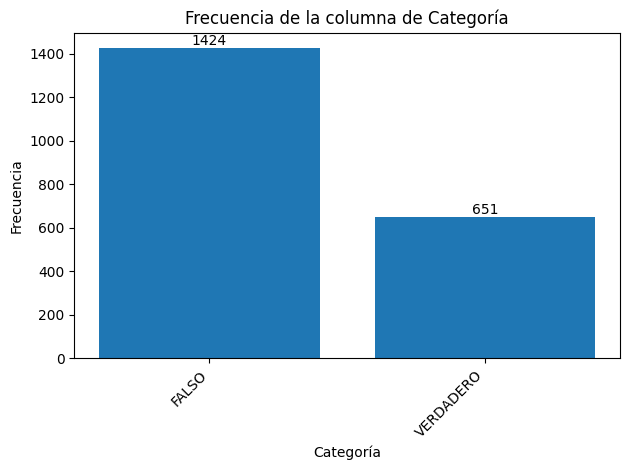

In [ ]:
#Graficamos la columna category
graficar_histograma(df_eda, "Categoría")


vemos que esta perfectamente equilibrada las noticias de fake y true para el df de train

##Estadisticas de cada frase de los textos

In [ ]:
df_stats = estadisticas_descriptivas_por_categoria(df_eda, "Texto", "Categoría")


=== Estadísticas globales ===
       token_count   char_count  sentence_count  exclamation_count  \
count  2075.000000  2075.000000     2075.000000        2075.000000   
mean    103.570120   637.987952        4.867470           0.240000   
std     181.933888  1127.708245        7.608316           1.057754   
min       1.000000     4.000000        0.000000           0.000000   
25%      17.000000   102.000000        0.000000           0.000000   
50%      32.000000   192.000000        2.000000           0.000000   
75%      68.000000   413.500000        5.000000           0.000000   
max     934.000000  5832.000000       45.000000          26.000000   

       question_count  uppercase_word_count  
count     2075.000000           2075.000000  
mean         0.132530              3.269398  
std          0.512408              7.175591  
min          0.000000              0.000000  
25%          0.000000              0.000000  
50%          0.000000              0.000000  
75%          0.00

##Observacion

X.5.2 Observación
Los textos VERDADEROS son mucho más largos (tanto en tokens como caracteres), con mediana y promedio muy por encima de los FALSOS.
La cantidad de frases en VERDADEROS es también mucho mayor, esto puede implicar que son más explicativos.
Aunque los textos falsos usan más mayúsculas en promedio, también presentan una mayor dispersión  que los verdaderos.  Esto quiere decir que algunos textos falsos pueden tener muy pocas palabras en mayúsculas y otros muchísimas, por eso la desviación estándar es más alta. En los textos verdaderos, en cambio, el uso de mayúsculas está más concentrado alrededor del promedio, con menos extremos.
Exclamaciones son ligeramente más frecuentes en FALSOS, lo cual podría sugerir un estilo más sensacionalista.
Preguntas también son un poco más frecuentes en los VERDADEROS, pero la diferencia es menor.



##Observacion de ngramas

Un unigrama es simplemente una palabra aislada (cada token por separado): sirve para medir la frecuencia de términos individuales en un texto y usarse como característica en tareas como clasificación o análisis de sentimiento.

Un bigrama es un par de palabras contiguas (dos tokens juntos): captura relaciones de contexto y orden (“nuevo gobierno”, “año pasado”), aportando información extra sobre combinaciones frecuentes que los unigrama no ven. Ambos n-gramas se usan para transformar el texto en vectores numéricos (por ejemplo con Bag-of-Words o TF-IDF) y así alimentar algoritmos de machine learning en NLP.

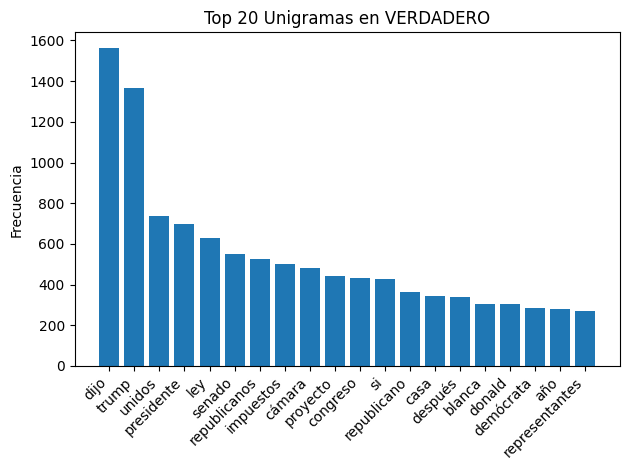

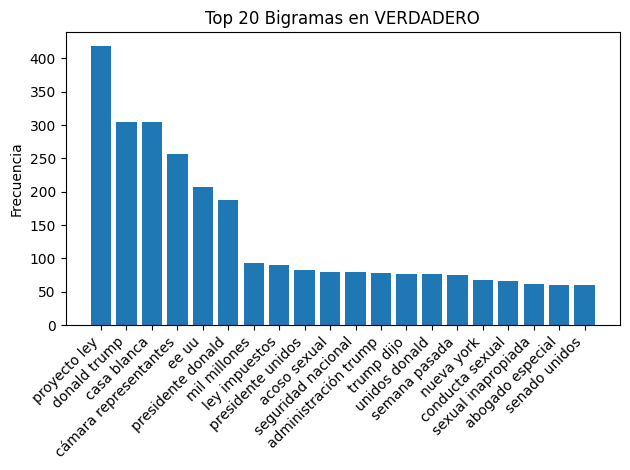

Top 20 términos TF-IDF en VERDADERO:
          term    score
          dijo 0.046942
         trump 0.041184
           ley 0.027150
     impuestos 0.024684
        unidos 0.024502
        senado 0.023986
    presidente 0.023079
        cámara 0.022565
      proyecto 0.022231
  republicanos 0.021085
      congreso 0.017508
            si 0.016861
          casa 0.016042
   republicano 0.015542
        blanca 0.015129
      gobierno 0.014647
representantes 0.014133
     demócrata 0.013591
   legislación 0.013394
        fiscal 0.013371 



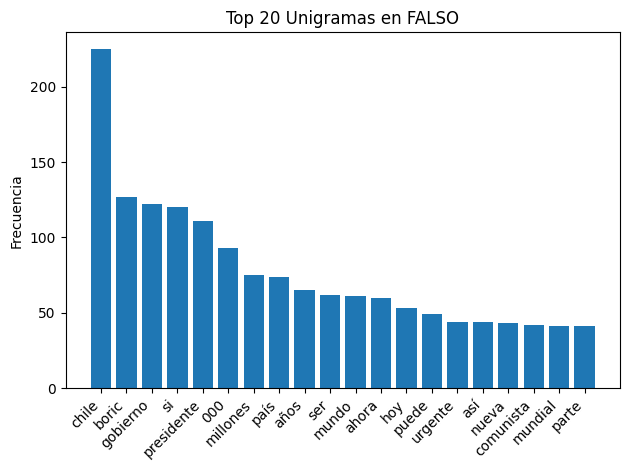

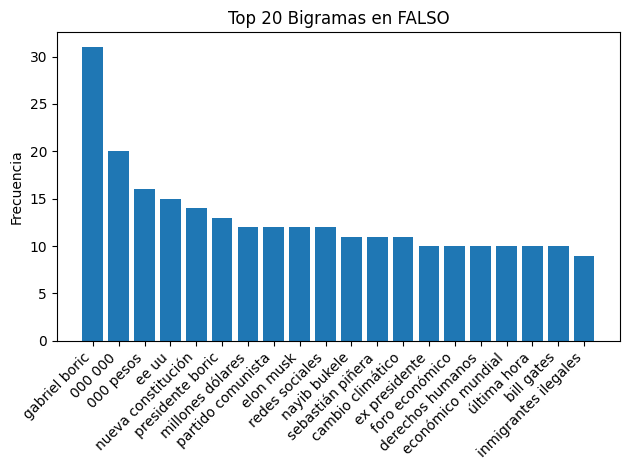

Top 20 términos TF-IDF en FALSO:
      term    score
     chile 0.017842
     boric 0.012920
  gobierno 0.011021
presidente 0.010929
        si 0.009187
  millones 0.007695
       000 0.007500
      país 0.006686
      años 0.006098
     mundo 0.005963
     ahora 0.005950
       ser 0.005622
   urgente 0.005368
     nueva 0.005341
    israel 0.005280
       así 0.005252
       hoy 0.005175
     puede 0.004864
   gabriel 0.004849
     milei 0.004818 



In [ ]:
vocabulario_y_ngramas(df_eda, texto_col="Texto", cat_col="Categoría", top_k=20)

Al echar un vistazo a los unigramas, vemos que tanto en Fake como en True destaca con creces la palabra “number”, pero mientras en las noticias verdaderas su frecuencia rozó las 2 670 apariciones, en las falsas apenas llegó a 740, lo que nos dice que el uso de cifras y datos numéricos está mucho más concentrado en el contenido auténtico. En Fake, junto a “number” y “méxico” aparecen con fuerza conectores y matizadores de estilo (“si”, “así”, “pues”, “solo”), nombres de partidos o movimientos muy activos (“pri”, “amlo”) y expresiones de discurso político (“obrador”, “peña”, “candidato”), rasgos propios de titulares o textos sensacionalistas que buscan enganchar al lector con frases cortas y contundentes. Por contra, en True conviven esos términos políticos con vocabulario más diverso y orientado a la explicación de hechos (“millones”, “dos”, “nacional”, “parte”, “partido”), lo que expresa un tono más informativo y menos acotado a la polémica.

Si pasamos a los bigrams, la brecha se amplía: en True los pares más frecuentes combinan “number” con cuantificadores (“number años”, “number millones”, “number mil”), reflejando datos y estadísticas propios de reportajes de fondo, mientras que en Fake aparecen una buena parte de bigramas de marca de click-bait o de “eco político” (“lopez obrador”, “andrés manuel”, “conferencia prensa”, “redes sociales”), junto a referencias más dramáticas como “donald trump” pero en un contexto de repetición que las True no aúpan tanto.

Finalmente, en los términos TF-IDF se confirma este patrón: aunque “number” y “méxico” siguen siendo top en ambas, en Fake suben posiciones palabras que añaden urgencia o juicio (“así”, “solo”, “día”), y en True ganan peso términos relacionados con la cuantificación y la narrativa de fondo (“trump”, “millones”, “dos”, “parte”, “partido”). En conclusión, las Fake se nutren de un vocabulario más reducido, repetitivo y sensacionalista, con mayor presencia de marcadores de estilo y referencias políticas concretas, mientras que las True exploran un espectro léxico más amplio centrado en datos, contexto histórico y argumentación. Esto sugiere que incluir n-gramas políticos y “falsos conectores” como features, junto a métricas de densidad numérica y diversidad léxica, puede potenciar la detección automática de fake news.

In [ ]:
df_metrics = metricas_semanticas_estilo(df_eda, text_col="Texto")
df_stats_sem = comparar_metricas_por_categoria(df_metrics, cat_col="Categoría")
display(df_stats_sem)

Metricas que se evaluaran de los textos
1. Legibilidad

    Flesch Reading Ease: Proporciona un puntaje numérico donde los valores más altos indican textos más fáciles de comprender. Se calcula a partir de la longitud media de las oraciones y de las sílabas por palabra, y su interpretación se basa en escalas estandarizadas de legibilidad.

    SMOG Index: Estima el nivel educativo (en años de escolaridad) necesario para comprender con facilidad el texto. Se fundamenta en el conteo de palabras polisilábicas y ofrece una medida de la complejidad léxica y morfosintáctica.

2. Proporción de verbos en presente

    Determina la fracción de verbos conjugados en tiempo presente respecto al total de verbos del texto. Un valor elevado revela un uso predominante de construcciones que sitúan la acción en el momento actual, lo cual puede reflejar inmediatez o sensacionalismo.

3. Entidades nombradas

    Extrae y clasifica las menciones de entidades del texto (por ejemplo PERSON, ORG, GPE, LOC) mediante técnicas de reconocimiento de entidades nombradas (NER). Devuelve tanto un diccionario con el número de ocurrencias por cada categoría como un recuento total, lo que permite cuantificar la densidad informativa y la presencia de actores o lugares concretos.

4. Sentimiento

    Polaridad: Mide la orientación afectiva global del fragmento en una escala de –1 (muy negativo) a +1 (muy positivo). Un puntaje cercano a cero indica neutralidad.

    Subjetividad: Evalúa el grado de opinión o carga personal del texto, en un rango de 0 (completamente objetivo) a 1 (completamente subjetivo). Valores altos sugieren la presencia de juicios de valor, emociones o perspectivas personales.

Analisis de resultados

En conjunto, estas métricas semánticas y de estilo revelan matices interesantes:

1. Legibilidad (Flesch & SMOG)
    Ambas categorías —Fake (media Flesch ≈ 28.07; SMOG ≈ 16.25) y True (Flesch ≈ 27.99; SMOG ≈ 16.82)— se sitúan en rangos prácticamente idénticos, lo que indica que, tanto las noticias verdaderas como las falsas, exigen un nivel de lectura similar y tienen complejidad sintáctica y léxica muy parecida. La única diferencia notable es que las Fake muestran algo más de variabilidad en ambas escalas (desviación estándar mayor), fruto de artículos extremadamente simples o extraordinariamente rebuscados.

2. Tono (“proporción de verbos en presente”)
    Las Fake utilizan un porcentaje ligeramente superior de verbos en presente (0.326 vs. 0.318), apuntando a un estilo más urgente e inmediatista, mientras que las True tienden a narrar con un matiz temporal más variado.

3. Riqueza informativa (“entity_total”)
    Las verdaderas contienen casi el doble de entidades nombradas (media ≈ 39) que las falsas (media ≈ 20), lo que refleja mayor densidad de datos concretos —personas, organizaciones, lugares— en los reportajes auténticos frente a titulares o textos de “eco político” más planos.

4. Sentimiento (“polarity”)
    Ambos conjuntos orbitan cerca de la neutralidad (medias ≈ 0.03–0.05), pero las Fake tienen un rango de polaridad más amplio (desde –1 hasta +0.94), sugiriendo que cuando cargan emocionalmente pueden ser muy extremos. Las True, en cambio, aunque también cubren todo el espectro, se mantienen dentro de márgenes algo más moderados.

5.  Subjetividad(“subjectivity”)
    Contra lo que a veces se asume, las noticias auténticas resultan ligeramente más subjetivas (media ≈ 0.35; mediana ≈ 0.36) que las falsas (media ≈ 0.31; mediana ≈ 0.17). Esto podría deberse a que los reportajes reales combinan información con análisis u opiniones de expertos, mientras que muchas Fake se limitan a aseveraciones breves y directas.

En síntesis, mientras la legibilidad es idéntica, las Fake se distinguen por un uso más insistente del presente y una menor concreción (menos entidades), acompañados de picos emocionales más extremos. Las True, por su parte, equilibran datos y análisis, con mayor riqueza de entidades y una subjetividad ligeramente superior. Esta informacion indica que las features como “densidad de entidades”, “variabilidad de polaridad” o “proporción de presente” son candidatos prometedores para la diferenciacion entre noticias reales y fake news

=== ANÁLISIS DE VARIANZA EXPLICADA ===
PC1: 0.014 (1.40%)
PC2: 0.010 (0.98%)
Varianza acumulada PC1+PC2: 2.38%
Varianza acumulada primeros 10 componentes: 7.79%
Varianza acumulada primeros 20 componentes: 11.66%

=== TÉRMINOS MÁS IMPORTANTES ===
PC1 - Términos positivos:
  dijo: 0.0791
  senado: 0.0648
  presidente donald: 0.0639
  demócrata: 0.0595
  republicanos: 0.0594
  republicano: 0.0588
  donald: 0.0586
  donald trump: 0.0586
  trump: 0.0581
  cámara representantes: 0.0577

PC1 - Términos negativos:
  chile: -0.0179
  boric: -0.0133
  urgente: -0.0079
  gabriel boric: -0.0074
  gabriel: -0.0072
  comunista: -0.0071
  mas: -0.0065
  chilenos: -0.0065
  piñera: -0.0062
  milei: -0.0062


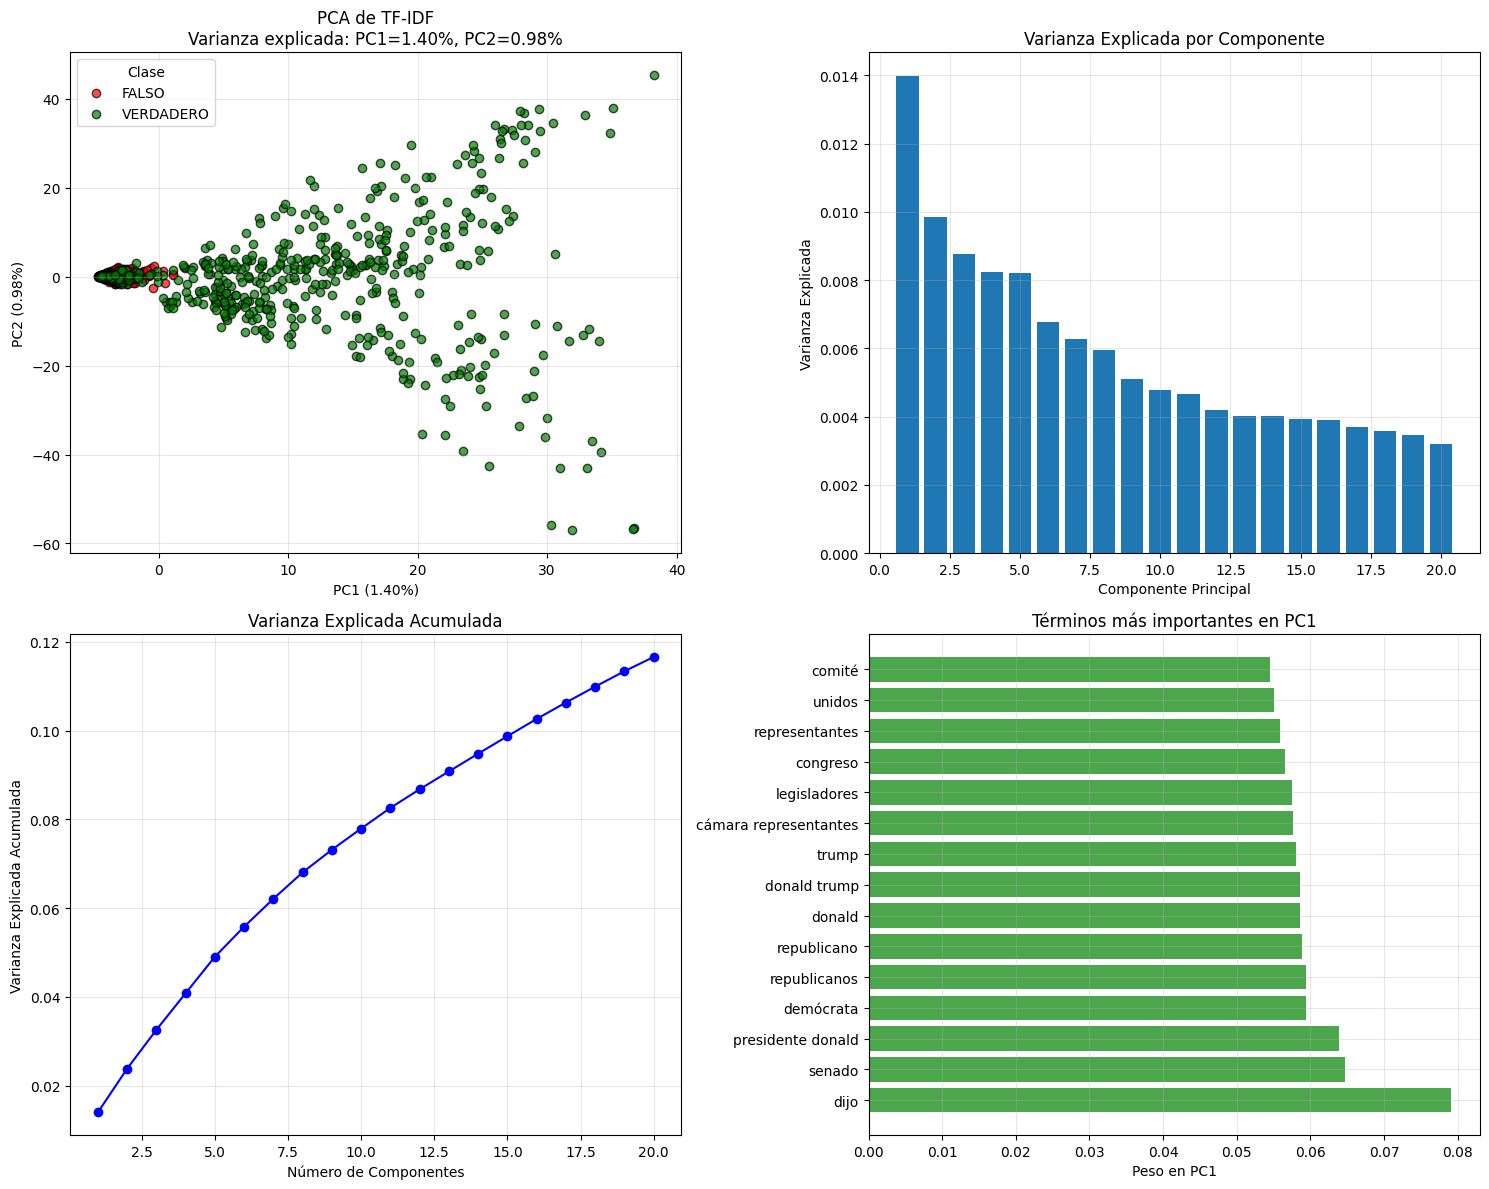


=== ESTADÍSTICAS ADICIONALES ===
Número total de términos: 5000
Forma de matriz TF-IDF: (2075, 5000)
Sparsity: 0.0077


{'pca': PCA(n_components=50, random_state=42),
 'vectorizer': TfidfVectorizer(max_df=0.95, max_features=5000, min_df=2, ngram_range=(1, 2),
                 stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                             'del', 'se', 'las', 'por', 'un', 'para', 'con',
                             'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                             'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                             'porque', ...],
                 sublinear_tf=True),
 'X_pca': array([[ 2.39617352e+01, -1.47110076e+01, -5.07105794e+00, ...,
         -4.95784891e-01,  1.88993075e+00, -3.16388673e+00],
        [-3.49592852e+00, -1.04313230e-02,  1.21273776e-01, ...,
          3.77818592e-01, -9.40334059e-01,  1.31650920e-01],
        [-2.49525174e+00,  4.03340133e-01,  1.60604295e-01, ...,
          1.13931332e-01, -1.25194539e+00,  9.03973839e-02],
        ...,
        [-4.58053297e+00,  1.06711124e-01,  2.86691106e-01, ...,
         

In [ ]:
visualizaciones_multivariantes(df_eda, text_col="Texto", cat_col="Categoría")

1. Scatter plots (PCA / t-SNE / UMAP)

    PCA: la proyección lineal no separa Fake (morado) y True (amarillo) en dos grupos claros: casi todo está superpuesto en un “abanico” muy compacto.

    t-SNE: sí aparecen algunos micro-clusters (especialmente en los extremos de Dim 1), pero dentro de cada uno la mezcla de Fake/True es alta. Solo ves zonas puntuales donde True tiende a agruparse (por ejemplo en torno a (30, 5)), pero ningún “corte” limpio.

    UMAP: algo intermedio: cierta densidad de True arriba-izquierda y de Fake abajo-derecha, pero con un solapamiento considerable.

Conclusión: no hay una separación natural fuerte solo con TF-IDF + reducción de dimensión. Los textos de Fake y True comparten la mayoría de su vocabulario y estructura, así que tendrás que combinar estos embedding con otras features o un modelo supervisado para distinguirlos bien.

Analisis de la matriz de correlacion


En la matriz de correlaciones, las métricas de longitud del texto—token_count (0.32), char_count (0.34) y sentence_count (0.31)—muestran una correlación moderada y positiva con la etiqueta “True”, lo que indica que los artículos más extensos tienden a ser auténticos. En cambio, los marcadores sensacionalistas como exclamation_count (–0.13) y uppercase_word_count (–0.11) se asocian ligeramente con las “Fake”, mientras que question_count aporta casi nada (–0.03). Además, token_count, char_count y sentence_count están casi perfectamente correlacionadas entre sí (≥0.86), señalando redundancia. En definitiva, la longitud del texto emerge como el rasgo numérico más discriminante, y solo un uso muy intenso de exclamaciones o mayúsculas aporta un pequeño sesgo hacia las noticias falsas.

# Preprocesamiento

In [ ]:
class TextPreprocessor:
    def __init__(self, lang: str = "es"):
        """
        Inicializa el preprocesador de texto con configuraciones de idioma.

        Args:
            lang (str): Idioma para procesamiento ('es' para español, 'en' para inglés)
        """
        self.lang = lang
        self.stop_words = set(stopwords.words("spanish" if lang == "es" else "english"))
        self.stop_words = self._get_enhanced_stopwords(lang)
        self.tokenizer = TweetTokenizer()
        self.stemmer = SnowballStemmer("spanish" if lang == "es" else "english")

        # Cargar modelo de spaCy para lematización y embeddings
        try:
            self.nlp = spacy.load("es_core_news_lg" if lang == "es" else "en_core_web_lg")
        except:
            spacy.cli.download("es_core_news_lg" if lang == "es" else "en_core_web_lg")
            self.nlp = spacy.load("es_core_news_lg" if lang == "es" else "en_core_web_lg")

        # Inicializar atributos para BERT
        self.bert_tokenizer = None
        self.bert_model = None

        # Diccionario de contracciones (puede expandirse)
        self.contractions = {
            "es": {
                "q": "que",
                "d": "de",
                "x": "por",
                "xa": "para",
                "xk": "porque",
                "dl": "del",
                "tb": "también"
            },
            "en": {
                "don't": "do not",
                "can't": "cannot",
                "won't": "will not",
                "i'm": "I am"  # Nota: Mantenemos la mayúscula en "I"
            }
        }

    def normalize_text(self, text: str) -> str:
        """
        Normaliza el texto manteniendo las mayúsculas/minúsculas originales.
        Realiza:
        1. Expansión de contracciones (respetando capitalización)
        2. Conversión de números a palabras
        3. Eliminación de caracteres especiales
        4. Normalización de espacios
        """
        text = str(text)  # No convertimos a minúsculas

        # Expansión de contracciones (respetando mayúsculas iniciales)
        for cont, exp in self.contractions.get(self.lang, {}).items():
            # Manejar casos donde la contracción está al inicio (mayúscula)
            if text.startswith(cont.capitalize()):
                text = re.sub(rf"\b{cont.capitalize()}\b", exp.capitalize(), text)
            # Caso general
            text = re.sub(rf"\b{cont}\b", exp, text, flags=re.IGNORECASE)

        # Convertir números a palabras (respetando mayúsculas iniciales)
        def num_to_words(match):
            num = match.group()
            # Si el número está al inicio de oración
            if match.start() == 0 or (match.start() > 0 and text[match.start()-1] in '.!?'):
                return num2words(num, lang=self.lang).capitalize()
            return num2words(num, lang=self.lang)

        text = re.sub(r'\d+', num_to_words, text)

        # Eliminar caracteres especiales (excepto signos de puntuación básicos)
        text = re.sub(r"[^\w\s.,!?¿¡]", " ", text)

        # Normalizar espacios
        text = re.sub(r"\s+", " ", text).strip()

        return text

    # ... (el resto de los métodos permanecen igual) ...

    def tokenize(self, text: str, advanced: bool = True) -> List[str]:
        """
        Tokeniza el texto con opción para tokenización avanzada (conserva emojis y jerga)
        """
        if advanced:
            return self.tokenizer.tokenize(text)
        return word_tokenize(text)

        self.stop_words = self._get_enhanced_stopwords(lang)

    def _get_enhanced_stopwords(self, lang: str) -> set:
        """Obtiene y mejora la lista de stopwords incluyendo variantes"""
        nltk.download('stopwords', quiet=True)
        base_stopwords = set(stopwords.words("spanish" if lang == "es" else "english"))

        # Añadir variantes comunes con acentos y mayúsculas
        enhanced_stopwords = base_stopwords.copy()
        if lang == "es":
            extras = {'él', 'ésta', 'éstas', 'éstos', 'Él', "él", "Él"}
            for word in list(base_stopwords):
                enhanced_stopwords.add(word.capitalize())
                enhanced_stopwords.add(word.upper())
            enhanced_stopwords.update(extras)

        return enhanced_stopwords

    def remove_stopwords(self, tokens: List[str]) -> List[str]:
        """Filtra stopwords considerando múltiples variantes"""
        return [token for token in tokens
                if token.lower() not in self.stop_words
                and token not in self.stop_words]

    def lemmatize(self, tokens: List[str]) -> List[str]:
        """Lematiza los tokens usando spaCy"""
        doc = self.nlp(" ".join(tokens))
        return [token.lemma_ for token in doc if token.lemma_.strip() != ""]

    def preprocess_text(self, text: str,
                       normalize: bool = True,
                       tokenize: bool = True,
                       remove_stopwords: bool = True,
                       lemmatize: bool = True,
                       advanced_tokenize: bool = True) -> Union[str, List[str]]:
        """
        Pipeline completo de preprocesamiento de texto.

        Args:
            text: Texto a procesar
            normalize: Aplicar normalización
            tokenize: Aplicar tokenización
            remove_stopwords: Eliminar stopwords
            lemmatize: Aplicar lematización
            advanced_tokenize: Usar TweetTokenizer (True) o word_tokenize (False)

        Returns:
            Texto procesado (str si tokenize=False, List[str] si tokenize=True)
        """
        if normalize:
            text = self.normalize_text(text)

        if not tokenize:
            return text

        tokens = self.tokenize(text, advanced=advanced_tokenize)

        if remove_stopwords:
            tokens = self.remove_stopwords(tokens)

        if lemmatize:
            tokens = self.lemmatize(tokens)

        return tokens

    def vectorize(self, texts: Union[List[str], List[List[str]]],
                  method: str = "tfidf",
                  **kwargs) -> np.ndarray:
        """
        Vectoriza textos usando diferentes métodos.

        Args:
            texts: Lista de textos o tokens preprocesados
            method: Método de vectorización ('tfidf', 'spacy', 'bert')
            **kwargs: Parámetros específicos para cada método

        Returns:
            Array numpy con las representaciones vectoriales
        """
        if method == "tfidf":
            return self._tfidf_vectorize(texts, **kwargs)
        elif method == "spacy":
            return self._spacy_vectorize(texts, **kwargs)
        elif method == "bert":
            return self._bert_vectorize(texts, **kwargs)
        else:
            raise ValueError(f"Método de vectorización no soportado: {method}")

    def _tfidf_vectorize(self, texts: Union[List[str], List[List[str]]],
                         max_features: int = 5000,
                         ngram_range: tuple = (1, 1)) -> np.ndarray:
        """Vectorización TF-IDF"""
        if isinstance(texts[0], list):
            texts = [" ".join(tokens) for tokens in texts]

        vectorizer = TfidfVectorizer(max_features=max_features,
                                    ngram_range=ngram_range)
        return vectorizer.fit_transform(texts).toarray()

    def _spacy_vectorize(self, tokens_list: List[List[str]],
                        reduce_dim: bool = True,
                        n_components: int = 300) -> np.ndarray:
        """Vectorización con embeddings de spaCy"""
        vectors = []

        for tokens in tokens_list:
            # Obtener embeddings para cada token y promediarlos
            doc = self.nlp(" ".join(tokens))
            if len(doc) > 0:
                vec = np.mean([token.vector for token in doc], axis=0)
            else:
                vec = np.zeros(self.nlp.vocab.vectors_length)
            vectors.append(vec)

        vectors = np.array(vectors)

        # Reducción dimensional opcional para compatibilidad
        if reduce_dim and vectors.shape[1] > n_components:
            svd = TruncatedSVD(n_components=n_components)
            vectors = svd.fit_transform(vectors)

        return vectors

    def _bert_vectorize(self, texts: Union[List[str], List[List[str]]],
                        model_name: str = "dccuchile/bert-base-spanish-wwm-cased",
                        **kwargs) -> np.ndarray:
        """Vectorización con BERT/RoBERTa"""
        try:
            from transformers import AutoTokenizer, AutoModel
            import torch
        except ImportError:
            raise ImportError("Para usar BERT, instala transformers: pip install transformers")

        # Cargar modelo si no está cargado o si cambia el nombre
        if (self.bert_tokenizer is None or
            self.bert_model is None or
            self.current_bert_model != model_name):

            print(f"⏳ Cargando modelo {model_name}...")
            self.bert_tokenizer = AutoTokenizer.from_pretrained(model_name, **kwargs.get('tokenizer_args', {}))
            self.bert_model = AutoModel.from_pretrained(model_name, **kwargs.get('model_args', {}))
            self.current_bert_model = model_name

        # Parámetros por defecto para el tokenizador
        tokenizer_args = {
            'return_tensors': 'pt',
            'padding': True,
            'truncation': True,
            'max_length': 512,
            'add_special_tokens': True
        }
        # Actualizar con parámetros proporcionados por el usuario
        tokenizer_args.update(kwargs.get('tokenizer_args', {}))

        if isinstance(texts[0], list):
            texts = [" ".join(tokens) for tokens in texts]

        # Tokenización
        inputs = self.bert_tokenizer(texts, **tokenizer_args)

        # Generación de embeddings
        with torch.no_grad():
            outputs = self.bert_model(**inputs)

        # Obtener y promediar embeddings
        embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()

        return embeddings

def preprocess_dataframe(
    df: pd.DataFrame,
    text_col: str = "text",
    preprocessor: Optional[TextPreprocessor] = None,
    lang: str = "es",
    normalize: bool = True,
    tokenize: bool = True,
    remove_stopwords: bool = True,
    lemmatize: bool = True,
    advanced_tokenize: bool = True,
    vectorize: bool = False,
    vector_method: str = "tfidf",
    save_vectors: bool = False,
    output_dir: str = "/content/drive/Shareddrives/Titulo 2/Dataset",
    output_filename: str = "vectorized_results",
    **vector_kwargs
) -> pd.DataFrame:
    """
    Preprocesa un DataFrame completo con múltiples opciones y opción para guardar vectores.

    Args:
        df: DataFrame de entrada
        text_col: Columna con el texto a procesar
        preprocessor: Instancia de TextPreprocessor (opcional)
        lang: Idioma ('es' o 'en')
        normalize: Aplicar normalización
        tokenize: Aplicar tokenización
        remove_stopwords: Eliminar stopwords
        lemmatize: Aplicar lematización
        advanced_tokenize: Usar TweetTokenizer
        vectorize: Aplicar vectorización
        vector_method: Método de vectorización ('tfidf', 'spacy', 'bert')
        save_vectors: Si True, guarda los vectores en archivos separados
        output_dir: Directorio donde guardar los resultados
        output_filename: Nombre base para los archivos de salida
        **vector_kwargs: Parámetros para el vectorizador

    Returns:
        DataFrame con columnas adicionales de texto procesado
    """
    if preprocessor is None:
        preprocessor = TextPreprocessor(lang=lang)

    df_processed = df.copy()

    # Preprocesamiento básico
    df_processed['cleaned_text'] = df_processed[text_col].apply(
        lambda x: preprocessor.preprocess_text(
            x,
            normalize=normalize,
            tokenize=False,
            remove_stopwords=False,
            lemmatize=False,
            advanced_tokenize=advanced_tokenize
        )
    )

    if tokenize:
        df_processed['tokens'] = df_processed['cleaned_text'].apply(
            lambda x: preprocessor.preprocess_text(
                x,
                normalize=False,
                tokenize=True,
                remove_stopwords=remove_stopwords,
                lemmatize=lemmatize,
                advanced_tokenize=advanced_tokenize
            )
        )

    # Vectorización (opcional)
    vector_data = None
    if vectorize:
        if not tokenize:
            raise ValueError("La vectorización requiere tokenización previa")

        vectors = preprocessor.vectorize(
            df_processed['tokens'].tolist(),
            method=vector_method,
            **vector_kwargs
        )

        # Crear columnas para los vectores en el DataFrame
        vector_cols = [f"{vector_method}_vec_{i}" for i in range(vectors.shape[1])]
        df_vectors = pd.DataFrame(vectors, columns=vector_cols)
        df_processed = pd.concat([df_processed, df_vectors], axis=1)

        # Guardar datos de vectorización si se solicita
        if save_vectors:
            import os
            import numpy as np

            # Crear directorio si no existe
            os.makedirs(output_dir, exist_ok=True)

            # Guardar vectores como archivo numpy
            np.save(os.path.join(output_dir, f"{output_filename}_vectors.npy"), vectors)

            # Guardar metadatos de vectorización
            vector_metadata = {
                'vector_method': vector_method,
                'vector_shape': vectors.shape,
                'columns': vector_cols,
                'parameters': vector_kwargs
            }

            import json
            with open(os.path.join(output_dir, f"{output_filename}_metadata.json"), 'w') as f:
                json.dump(vector_metadata, f, indent=2)

            print(f"✅ Vectores guardados en: {os.path.join(output_dir, output_filename)}_[vectors.npy|metadata.json]")

    return df_processed

## Argumentos de la llamada a funcion "Preprocesamiento"

Explicación detallada de cada parámetro:

1. df_train (obligatorio):

    El DataFrame de pandas que contiene los textos a procesar.

    Debe contener al menos la columna especificada en text_col.

2. text_col="Text":

    Nombre de la columna que contiene el texto a procesar.

    Por defecto busca una columna llamada "Text".

3. preprocessor=None:

    Permite pasar una instancia preconfigurada de TextPreprocessor.

    Si es None, crea una nueva instancia con los parámetros dados.

    Útil para reutilizar el mismo preprocesador en múltiples DataFrames.

4. lang="es":

    Idioma del texto ('es' para español, 'en' para inglés).

    Afecta a:

      * Lista de stopwords

      * Lematización

      * Expansión de contracciones

      * Conversión de números a palabras

5. normalize=True:

    Aplica normalización de texto que incluye:

      * Conversión a minúsculas

      * Expansión de contracciones (ej: "q" → "que")

      * Conversión de números a palabras (ej: "100" → "cien")

      * Eliminación de caracteres especiales

      * Normalización de espacios múltiples

6. tokenize=True:

    Si True, divide el texto en tokens (palabras/componentes).

    Si False, devuelve el texto como cadena limpia.

7. remove_stopwords=True:

    Elimina palabras vacías (stopwords) como "el", "la", "de".

    Usa la lista de stopwords del idioma especificado.

8. lemmatize=True:

    Reduce las palabras a su forma base (lema):

      Ej: "corriendo" → "correr", "gatos" → "gato"

    Usa el modelo de spaCy para lematización precisa.

9. advanced_tokenize=True:

    True: Usa TweetTokenizer (ideal para texto de redes sociales)

      * Conserva emojis, jerga, hashtags (si no se eliminan)

      * Maneja mejor apóstrofes y formas contraídas

    False: Usa word_tokenize de NLTK (tokenizador tradicional)

10. vectorize=True:

    Si True, aplica vectorización al texto tokenizado.

    Requiere que tokenize=True.

11. vector_method="bert":

    Método de vectorización a usar:

      * "tfidf": Vectorización TF-IDF tradicional

      * "word2vec": Entrena embeddings Word2Vec específicos

      * "glove": Usa embeddings GloVe pre-entrenados

      * "bert": Usa embeddings contextuales de BERT/RoBERTa

12. **vector_kwargs:

    Parámetros adicionales para el vectorizador:

      * Para TF-IDF:

       max_features=5000 (núm. máximo de features)

       ngram_range=(1,1) (rango de n-gramas)

      * Para word2vec:

       vector_size=300 (dimensión de los embeddings)

       window=5 (ventana de contexto)

      * Para glove:

       glove_path (ruta al archivo de embeddings)

      * Para bert:

       model_name (nombre del modelo HuggingFace)

13. Columnas generadas en el DataFrame resultante:

    * cleaned_text:

      Texto normalizado pero no tokenizado (solo si normalize=True)

    * tokens:

      Lista de tokens procesados (solo si tokenize=True)

      Depende de los parámetros remove_stopwords y lemmatize

    * Columnas de vectorización (solo si vectorize=True):

      Nombres como tfidf_vec_0, tfidf_vec_1, etc. para TF-IDF

      O bert_vec_0, bert_vec_1, etc. para BERT

      Una columna por dimensión del vecto

## Funcion de visualizacion

In [ ]:
def visualizar_preprocesamiento(df, col_texto_original="text", col_tokens="tokens", num_ejemplos=3):
    """
    Visualiza comparativamente el texto original vs. el preprocesado

    Args:
        df: DataFrame con los datos procesados
        col_texto_original: Columna con texto sin procesar
        col_tokens: Columna con tokens procesados
        num_ejemplos: Número de ejemplos a mostrar
    """
    # Configuración de estilo
    plt.style.use('ggplot')
    plt.figure(figsize=(12, 8))

    # 1. Comparación texto original vs procesado
    print("═"*60 + "\nCOMPARACIÓN TEXTO ORIGINAL VS PROCESADO\n" + "═"*60)
    for i in range(min(num_ejemplos, len(df))):
        print(f"\nEjemplo {i+1}:")
        print(f"[ORIGINAL]\n{df[col_texto_original].iloc[i][:500]}...")

        # Manejar posibles valores nulos en tokens
        tokens = df[col_tokens].iloc[i] if isinstance(df[col_tokens].iloc[i], list) else []
        print(f"\n[PROCESADO]\n{' '.join(tokens[:50])}...\n")
        print("-"*80)

    # 2. Nube de palabras
    plt.figure(figsize=(10, 5))

    # Limpiar y filtrar tokens
    palabras_a_excluir = {'él', 'el', 'Él', 'El'}

    # Convertir todos los valores a listas y filtrar
    todos_tokens_filtrados = []
    for tokens in df[col_tokens]:
        if isinstance(tokens, list):
            filtrado = [token for token in tokens if token not in palabras_a_excluir]
            todos_tokens_filtrados.extend(filtrado)
        else:
            continue  # Saltar valores no listas

    # Generar nube solo si hay tokens
    if len(todos_tokens_filtrados) > 0:
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            collocations=False
        ).generate(' '.join(todos_tokens_filtrados))

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title("Palabras más frecuentes (procesadas) - Excluyendo 'él/el'", pad=20)
    else:
        plt.text(0.5, 0.5, 'No hay tokens disponibles',
                ha='center', va='center', fontsize=12)
        plt.title("Sin datos para mostrar", pad=20)

    plt.axis("off")
    plt.show()

    # 3. Estadísticas básicas
    print("\n" + "═"*60 + "\nESTADÍSTICAS DEL PREPROCESAMIENTO\n" + "═"*60)

    # Calcular estadísticas limpiando los datos primero
    stats_data = {
        'Longitud promedio (tokens)': df[col_tokens].apply(
            lambda x: len(x) if isinstance(x, list) else 0).mean(),
        'Tokens únicos': len(set(
            [token
             for sublist in df[col_tokens]
             if isinstance(sublist, list)
             for token in sublist])),
        'Ejemplos procesados': len(df)
    }

    stats = pd.DataFrame(stats_data, index=[0])

    display(stats.style.set_caption("Métricas clave").set_table_styles(
        [{'selector': 'caption', 'props': [('font-size', '14pt'), ('font-weight', 'bold')]}]
    ))

In [ ]:
# 2. Inicializar el preprocesador para español
preprocesador = TextPreprocessor(lang="es")

# 3. Procesamiento completo con TF-IDF
# Procesamiento con guardado de vectores
df_procesado = preprocess_dataframe(
    df_eda,
    text_col="text",
    lang="es",
    normalize=True,
    tokenize=True,
    remove_stopwords=True,
    lemmatize=True,
    advanced_tokenize=True,
    vectorize=True,
    vector_method="tfidf",
    save_vectors=True,
    output_dir="/content/drive/Shareddrives/Titulo 2/Dataset/Vectorizaciones",
    output_filename="FakeNews_tfidf",
    max_features=5000,
    ngram_range=(1, 2)
)

# 4. Mostrar resultados
print("\n=== Datos originales ===")
display(df_eda[['id', 'text']])

print("\n=== Texto procesado y tokens ===")
display(df_procesado[['cleaned_text', 'tokens']].head())

print("\n=== Vectores TF-IDF (primeras 5 dimensiones) ===")
# Mostrar solo las primeras 5 columnas de los vectores
vector_cols = [col for col in df_procesado.columns if 'tfidf_vec_' in col]
display(df_procesado[vector_cols[:5]].head().style.format("{:.3f}"))

print("\n=== Estadísticas de los vectores ===")
print(f"Dimensionalidad: {len(vector_cols)} features")
print(f"Valores promedio por dimensión:\n{df_procesado[vector_cols].mean().describe()}")

✅ Vectores guardados en: /content/drive/Shareddrives/Titulo 2/Dataset/Vectorizaciones/FakeNews_tfidf_[vectors.npy|metadata.json]

=== Datos originales ===


id                                               text
0        1  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...
1        2  La palabra "haiga", aceptada por la RAE La Rea...
2        3  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...
3        4  UNAM capacitará a maestros para aprobar prueba...
4        5  Alerta: pretenden aprobar libros escolares con...
...    ...                                                ...
1242  1244  Durante los últimos cuatro años, la ciudad no ...
1243  1245  El Instituto de Diagnóstico y Referencia Epide...
1244  1246  La hija del rey Felipe y de la reina Letizia y...
1246  1248  El Ministerio de Sanidad ha actualizado los da...
1247  1249  Fue en el mes de febrero de 2014 cuando la rev...

[1173 rows x 2 columns]


=== Texto procesado y tokens ===


cleaned_text  \
0  RAE INCLUIRÁ LA PALABRA LADY EN EL DICCIONARIO...   
1  La palabra haiga , aceptada por la RAE La Real...   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  Alerta pretenden aprobar libros escolares con ...   

                                              tokens  
0  [RAE, incluirá, PALABRA, LADY, DICCIONARIO, ID...  
1  [palabra, haiga, ,, aceptado, RAE, Real, Acade...  
2  [YORDI, rosado, escribirá, DISEÑARÁ, NUEVOS, L...  
3  [UNAM, capacitar, maestro, aprobar, prueba, Pi...  
4  [Alerta, pretender, aprobar, libro, escolar, c...


=== Vectores TF-IDF (primeras 5 dimensiones) ===



=== Estadísticas de los vectores ===
Dimensionalidad: 5000 features
Valores promedio por dimensión:
count    5000.000000
mean        0.001780
std         0.002233
min         0.000103
25%         0.000706
50%         0.001068
75%         0.001937
max         0.055949
dtype: float64


In [ ]:
# 3. Procesamiento completo con TF-IDF
# Procesamiento con guardado de vectores
df_procesado = preprocess_dataframe(
    df_eda,
    text_col="text",
    lang="es",
    normalize=True,
    tokenize=True,
    remove_stopwords=True,
    lemmatize=True,
    vectorize=True,
    vector_method="spacy",
    save_vectors=True,
    output_dir="/content/drive/Shareddrives/Titulo 2/Dataset/Vectorizaciones",
    output_filename="FakeNews_spacy",
    reduce_dim=True,         # Si True, reduce dimensionalidad con TruncatedSVD
    n_components=300         # Dimensiones finales si reduce_dim=True
)

Exception ignored in: <function _xla_gc_callback at 0x781ae58836a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
# 3. Procesamiento completo con TF-IDF
# Procesamiento con guardado de vectores
df_procesado = preprocess_dataframe(
    df_eda,
    text_col="text",
    lang="es",
    normalize=True,
    tokenize=True,
    remove_stopwords=True,
    lemmatize=True,
    vectorize=True,
    vector_method="bert",
    save_vectors=True,
    output_dir="/content/drive/Shareddrives/Titulo 2/Dataset/Vectorizaciones",
    output_filename="FakeNews_bert",
    model_name="dccuchile/bert-base-spanish-wwm-cased",  # Modelo HuggingFace a usar
    return_tensors="pt",
    padding=True,
    truncation=True,
    max_length=128,  # Reducir longitud máxima
    add_special_tokens=True
)

════════════════════════════════════════════════════════════
COMPARACIÓN TEXTO ORIGINAL VS PROCESADO
════════════════════════════════════════════════════════════

Ejemplo 1:
[ORIGINAL]
RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONARIO DEL IDIOMA ESPAÑOL COMO DEFINICIÓN DE "MUJER PROBLEMÁTICA"
España.- El presidente de la Real Academia Española (RAE), Darío Villanueva, informó en conferencia de prensa que a partir del próximo mes se incluirá el término "Lady" como una nueva palabra en el diccionario del idioma español.
Darío señaló que "Lady" servirá para definir a una "mujer problemática" o a una "mujer que causa problemas", y mencionó que esta palabra será una de las pocas que...

[PROCESADO]
RAE incluirá PALABRA LADY DICCIONARIO IDIOMA ESPAÑOL definición mujer PROBLEMÁTICA España . presidente Real Academia Española RAE , Darío Villanueva , informar conferencia prensa partir próximo mes incluir término Lady nuevo palabra diccionario idioma español . Darío señalar Lady servir definir mu

<Figure size 1200x800 with 0 Axes>

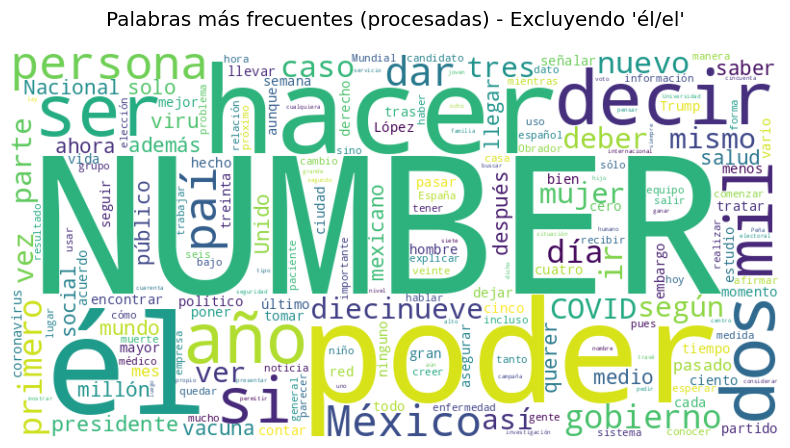


════════════════════════════════════════════════════════════
ESTADÍSTICAS DEL PREPROCESAMIENTO
════════════════════════════════════════════════════════════


In [ ]:
# Luego visualizamos
visualizar_preprocesamiento(df_procesado, num_ejemplos=2)

In [ ]:
# prompt: Desplega los registros que contienen valores nulos en df_procesado en las columnas que no sean tfidf_vec_xxxx con todos sus datos excepto esas columnas

# Identificar columnas que no son tfidf_vec_xxxx
non_tfidf_cols = [col for col in df_procesado.columns if 'tfidf_vec_' not in col]

# Seleccionar solo las columnas que no son tfidf_vec_xxxx
df_non_tfidf = df_procesado[non_tfidf_cols]

# Filtrar filas donde haya algún valor nulo en las columnas no tfidf_vec_xxxx
# `any(axis=1)` comprueba si hay *algún* valor nulo en la fila, considerando solo las columnas seleccionadas
rows_with_nulls_in_non_tfidf = df_non_tfidf[df_non_tfidf.isnull().any(axis=1)]

# Mostrar las filas filtradas
display(rows_with_nulls_in_non_tfidf)


id category topic source headline text link cleaned_text tokens
679  NaN      NaN   NaN    NaN      NaN  NaN  NaN          NaN    NaN
681  NaN      NaN   NaN    NaN      NaN  NaN  NaN          NaN    NaN
691  NaN      NaN   NaN    NaN      NaN  NaN  NaN          NaN    NaN
692  NaN      NaN   NaN    NaN      NaN  NaN  NaN          NaN    NaN
707  NaN      NaN   NaN    NaN      NaN  NaN  NaN          NaN    NaN
...   ..      ...   ...    ...      ...  ...  ...          ...    ...
1114 NaN      NaN   NaN    NaN      NaN  NaN  NaN          NaN    NaN
1115 NaN      NaN   NaN    NaN      NaN  NaN  NaN          NaN    NaN
1121 NaN      NaN   NaN    NaN      NaN  NaN  NaN          NaN    NaN
1125 NaN      NaN   NaN    NaN      NaN  NaN  NaN          NaN    NaN
1142 NaN      NaN   NaN    NaN      NaN  NaN  NaN          NaN    NaN

[69 rows x 9 columns]

In [ ]:
# prompt: cantidad de valores nulos en df_procesado

print("Cantidad de valores nulos por columna en df_procesado:")
print(df_procesado.isnull().sum())

Cantidad de valores nulos por columna en df_procesado:
id                69
category          69
topic             69
source            69
headline          69
                  ..
tfidf_vec_4995    69
tfidf_vec_4996    69
tfidf_vec_4997    69
tfidf_vec_4998    69
tfidf_vec_4999    69
Length: 5009, dtype: int64


In [ ]:

print("Cantidad de valores nulos por columna en df_eda:")
print(df_eda.isnull().sum())

Cantidad de valores nulos por columna en df_eda:
id          0
category    0
topic       0
source      0
headline    0
text        0
link        0
dtype: int64


In [ ]:
# prompt: cantidad de registros en df_eda

print(f"El dataframe df_eda tiene {df_eda.shape[0]} registros.")

El dataframe df_eda tiene 1173 registros.
